<a href="https://colab.research.google.com/github/sagarghosh2/CBTC/blob/main/CBTC_UNEMPLOYMENT_ANALYSIS_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:-SAGAR GHOSH    
TASK 1- UNEMPLOYMENT ANALYSIS WITH PYTHON

In [ ]:
import pandas as pd
import numpy as np
import calendar

In [ ]:
df = pd.read_excel('/content/Unemployment_Rate_upto_11_2020 (3).xlsx')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
Longitude,0
Latitude,0


In [ ]:
# Renaming columns for better clarity
df.columns = [
    'States', 'Date', 'Frequency', 'Estimated_Unemployment_Rate', 'Estimated_Employed',
    'Estimated_Labour_Participation_Rate', 'Region', 'Longitude', 'Latitude'
]

# Converting 'Date' column to datetime format with dayfirst=True to accommodate day-first date formats
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type for efficient memory usage and operations
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

# Extracting month from 'Date' and creating a new 'Month' column as integers
df['Month'] = df['Date'].dt.month

# Mapping integer month values to abbreviated month names and creating 'Month_name' column
df['Month_name'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column if it's not needed
df.drop(columns='Month', inplace=True)

# Display the modified DataFrame to verify changes
print(df.head())


           States       Date Frequency  Estimated_Unemployment_Rate  \
0  Andhra Pradesh 2020-01-31         M                         5.48   
1  Andhra Pradesh 2020-02-29         M                         5.83   
2  Andhra Pradesh 2020-03-31         M                         5.79   
3  Andhra Pradesh 2020-04-30         M                        20.51   
4  Andhra Pradesh 2020-05-31         M                        17.43   

   Estimated_Employed  Estimated_Labour_Participation_Rate Region  Longitude  \
0            16635535                                41.02  South    15.9129   
1            16545652                                40.90  South    15.9129   
2            15881197                                39.18  South    15.9129   
3            11336911                                33.10  South    15.9129   
4            12988845                                36.46  South    15.9129   

   Latitude Month_name  
0     79.74        Jan  
1     79.74        Feb  
2     79.74      

In [ ]:
# Selecting the relevant columns for statistical analysis
df_stat = df[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]

# Calculating descriptive statistics
descriptive_stats = df_stat.describe().T

# Adding additional statistics
descriptive_stats['variance'] = df_stat.var()
descriptive_stats['skewness'] = df_stat.skew()

# Rounding the statistics to 2 decimal places for better readability
descriptive_stats = round(descriptive_stats, 2)

# Displaying the descriptive statistics
print(descriptive_stats)


                                     count         mean          std  \
Estimated_Unemployment_Rate          267.0        12.24        10.80   
Estimated_Employed                   267.0  13962105.72  13366318.36   
Estimated_Labour_Participation_Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated_Unemployment_Rate               0.50        4.84        9.65   
Estimated_Employed                   117542.00  2838930.50  9732417.00   
Estimated_Labour_Participation_Rate      16.77       37.26       40.39   

                                             75%          max      variance  \
Estimated_Unemployment_Rate                16.76        75.85  1.167100e+02   
Estimated_Employed                   21878686.00  59433759.00  1.786585e+14   
Estimated_Labour_Participation_Rate        44.06        69.69  6.155000e+01   

                                     skewness  
Estimated_Unemployment_Rate              2.22  
E

In [ ]:
# Grouping the data by 'Region' and calculating the mean of specified columns
region_stats = df.groupby('Region')[['Estimated_Unemployment_Rate', 'Estimated_Employed',
                                     'Estimated_Labour_Participation_Rate']].mean().reset_index()

# Rounding the results to two decimal places for better readability
region_stats = region_stats.round(2)

# Displaying the region-wise statistics
print(region_stats)


      Region  Estimated_Unemployment_Rate  Estimated_Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated_Labour_Participation_Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


<ipython-input-10-24de56d6abd5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = df.groupby('Region')[['Estimated_Unemployment_Rate', 'Estimated_Employed',


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


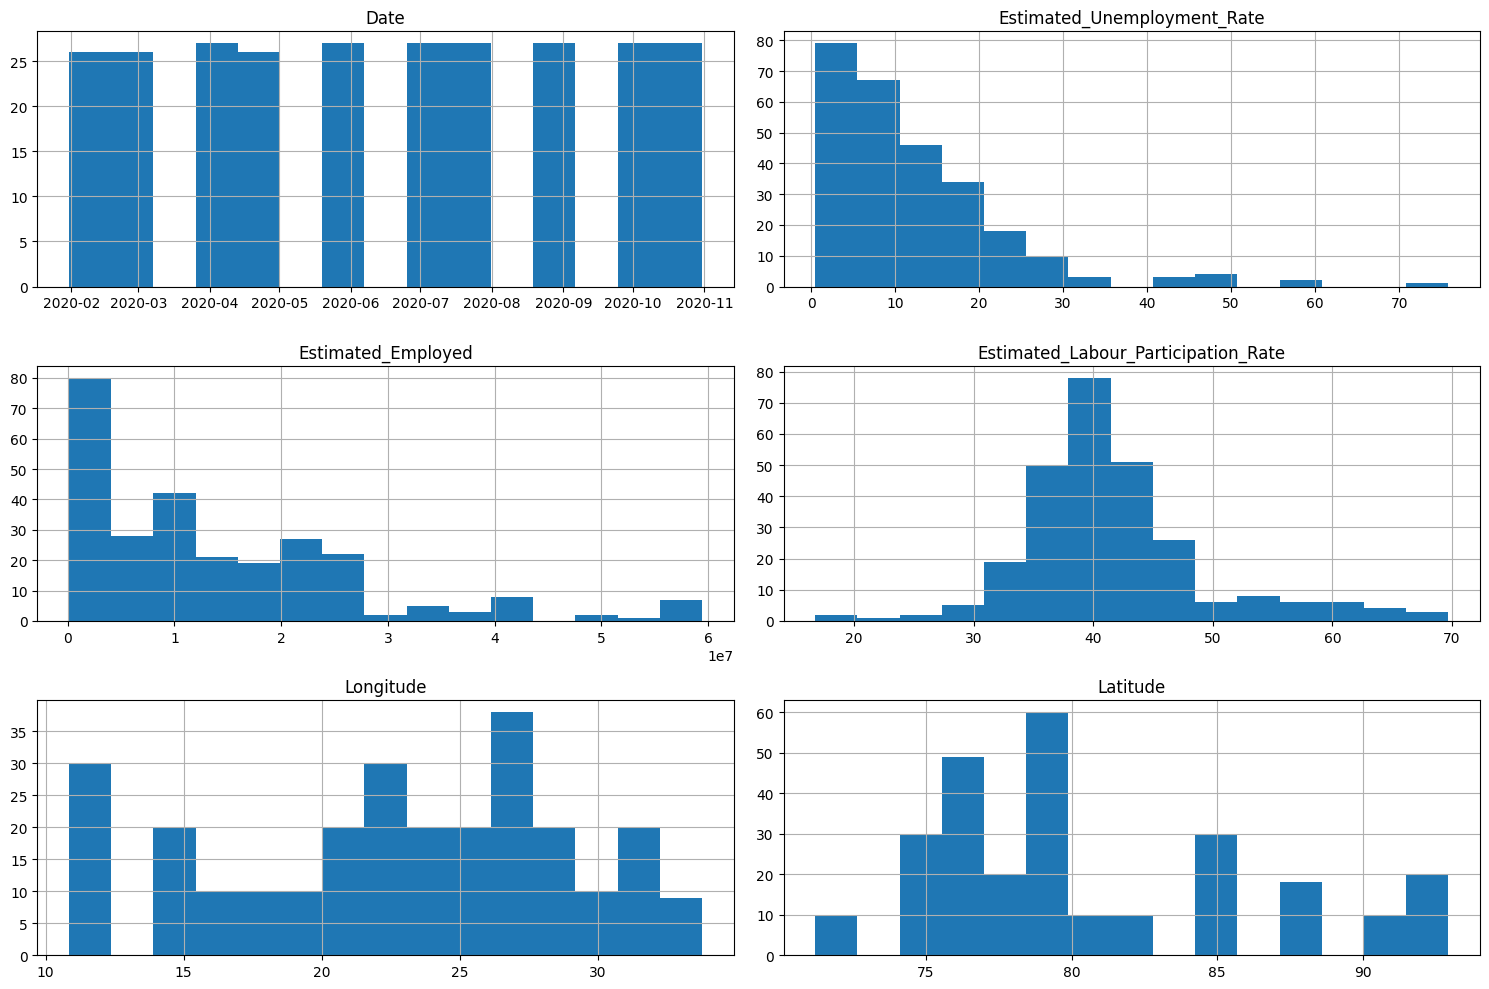

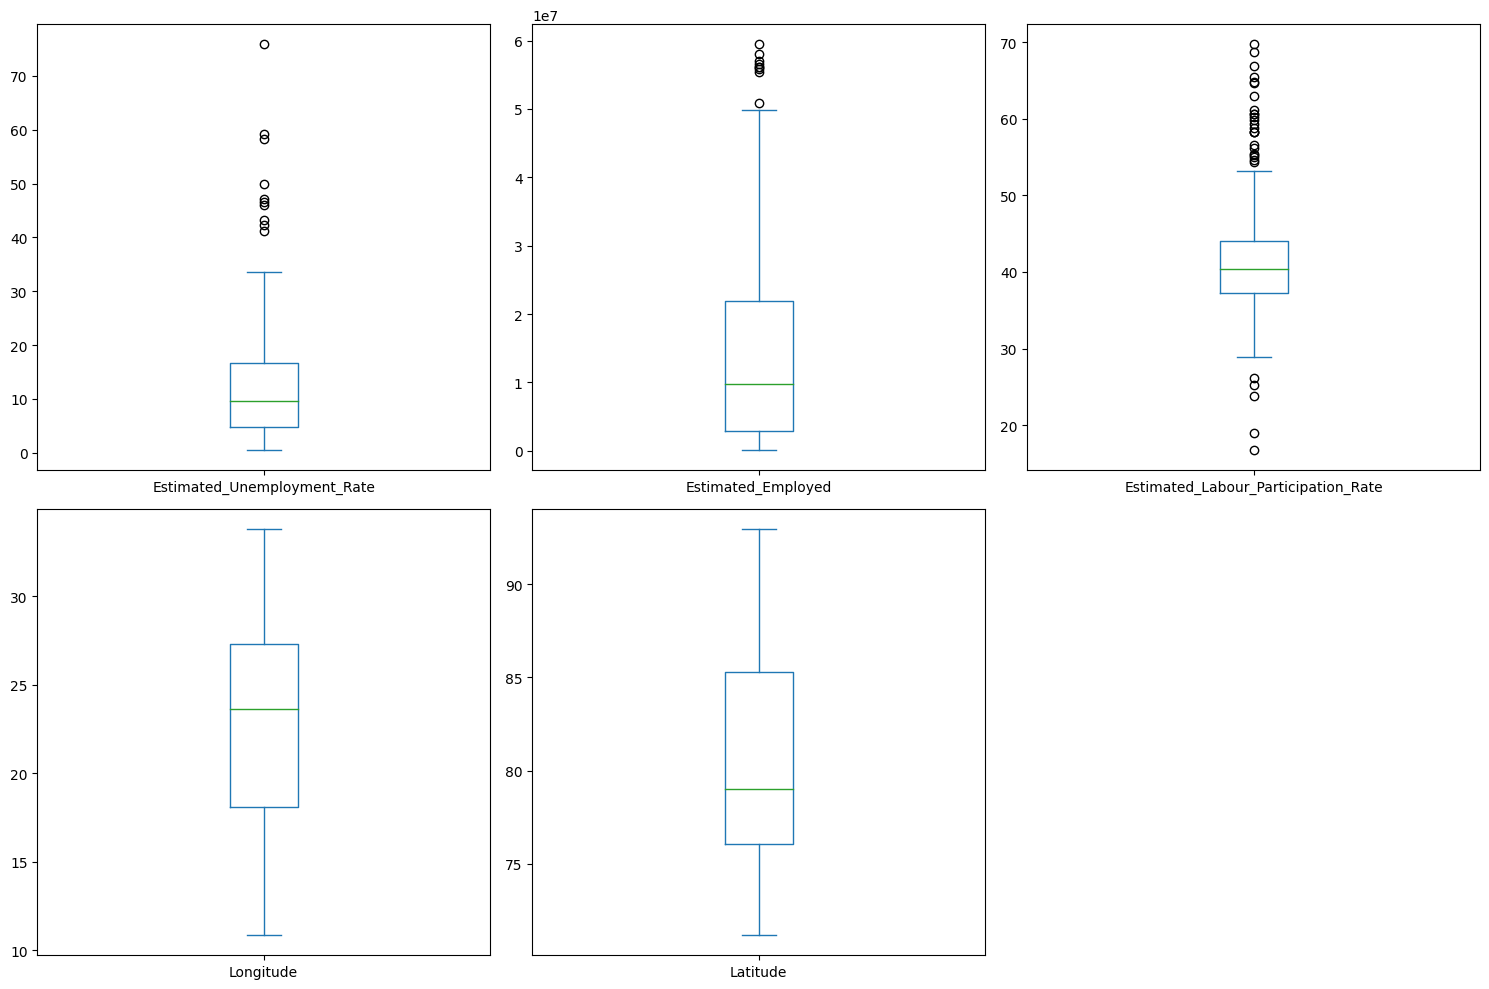

In [ ]:
# Plot histograms for numerical features
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plot for each numerical column
num_cols = ['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate', 'Longitude', 'Latitude']
df[num_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()


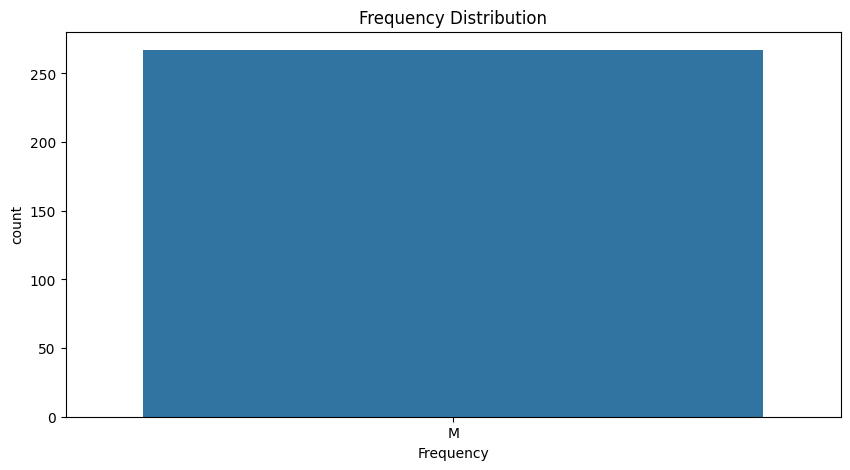

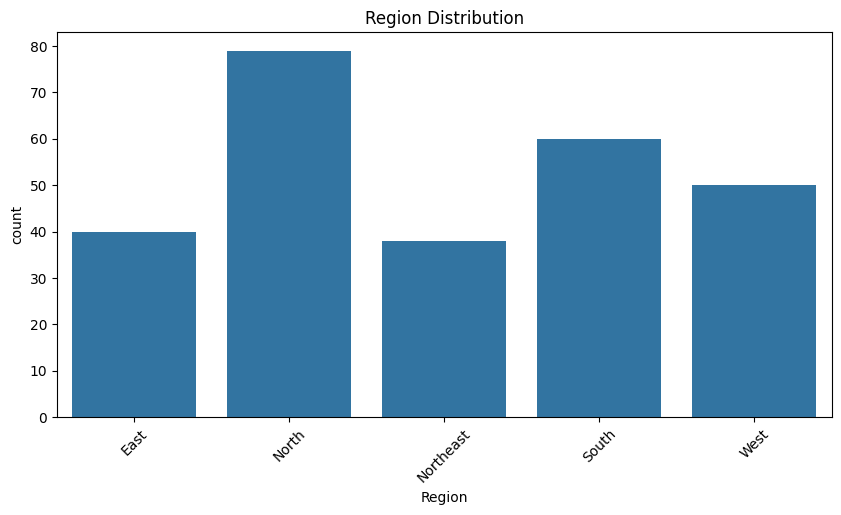

In [ ]:
# Plot count plots for categorical features
plt.figure(figsize=(10, 5))
sns.countplot(x='Frequency', data=df)
plt.title('Frequency Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=df)
plt.title('Region Distribution')
plt.xticks(rotation=45)
plt.show()


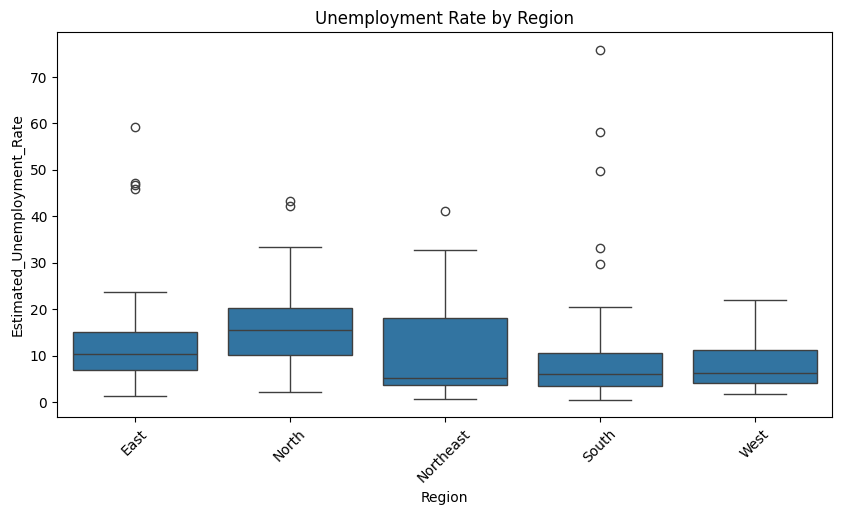

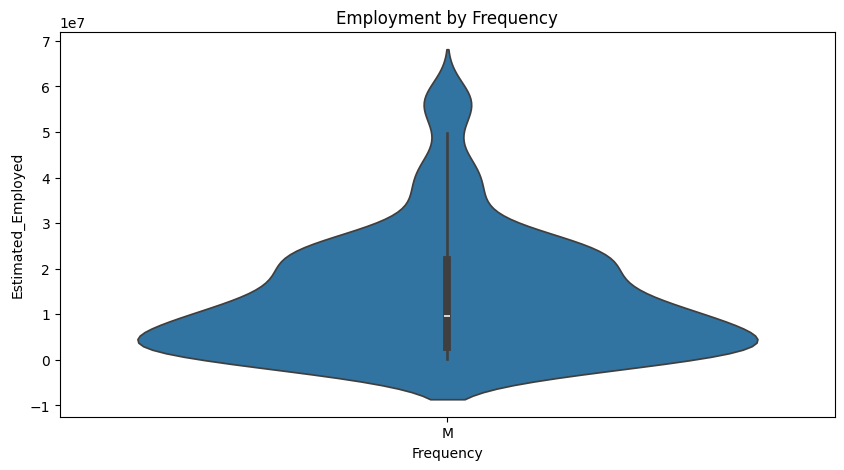

In [ ]:
# Box plot of 'Estimated_Unemployment_Rate' by 'Region'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='Estimated_Unemployment_Rate', data=df)
plt.title('Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.show()

# Violin plot of 'Estimated_Employed' by 'Frequency'
plt.figure(figsize=(10, 5))
sns.violinplot(x='Frequency', y='Estimated_Employed', data=df)
plt.title('Employment by Frequency')
plt.show()


In [ ]:
import folium

# Create a map centered around the mean latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=5)

# Adding points to the map
for _, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['States']}: {row['Estimated_Unemployment_Rate']}").add_to(map)

# Display the map
map


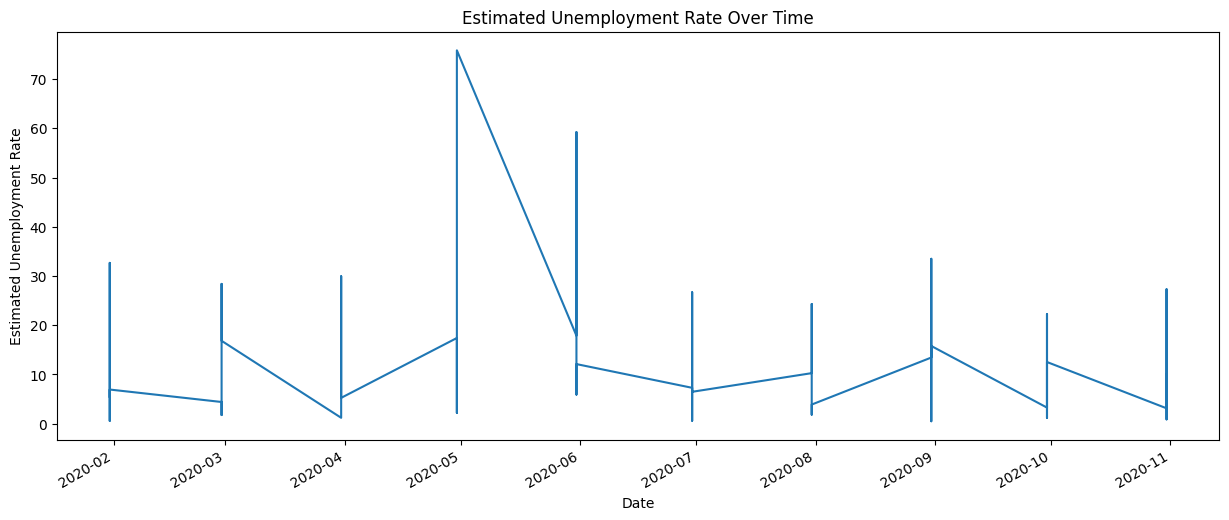

In [ ]:
# Plotting time series data for 'Estimated_Unemployment_Rate'
df.set_index('Date', inplace=True)
df['Estimated_Unemployment_Rate'].plot(figsize=(15, 6))
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.show()

# Resetting the index if needed
df.reset_index(inplace=True)


Index(['Date', 'States', 'Frequency', 'Estimated_Unemployment_Rate',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate', 'Region',
       'Longitude', 'Latitude', 'Month_name'],
      dtype='object')


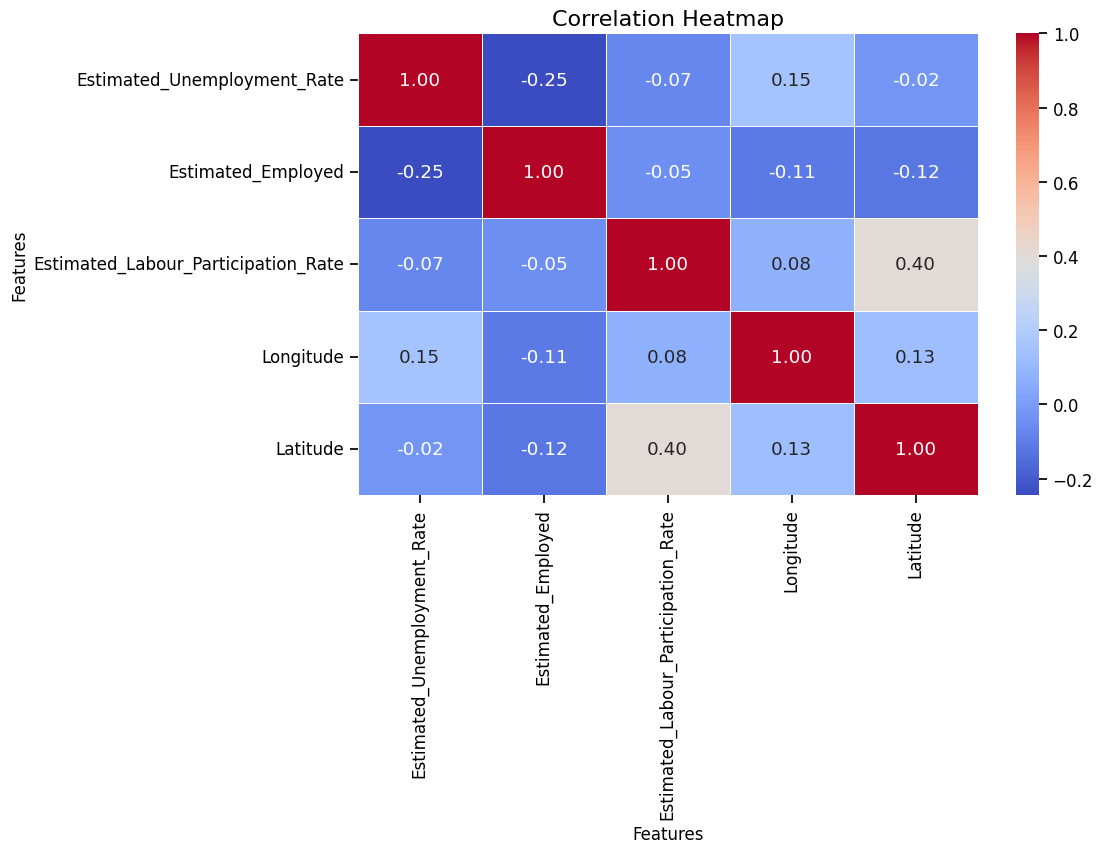

In [ ]:
# Check available columns in the DataFrame
print(df.columns)

# Selecting relevant columns for correlation analysis, only including those that exist
selected_columns = ['Estimated_Unemployment_Rate', 'Estimated_Employed',
                    'Estimated_Labour_Participation_Rate', 'Longitude',
                    'Latitude']

# Check if 'Month_int' column exists and include it if available
if 'Month_int' in df.columns:
    selected_columns.append('Month_int')

# Subset the DataFrame with the selected columns
hm = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = hm.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1.1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()



In [ ]:
import plotly.express as px

# Define the dimensions for the scatter matrix
dimensions = ['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']

# Creating the scatter matrix plot
fig = px.scatter_matrix(
    df,
    dimensions=dimensions,
    color='Region',
    template='seaborn',
    title='Scatter Matrix of Employment Data by Region'
)

# Update the layout for better readability
fig.update_layout(
    height=800,  # Set the height of the plot
    width=800,   # Set the width of the plot
    title=dict(x=0.5),  # Center the title
    font=dict(size=10), # Adjust the font size
    hoverlabel=dict(font_size=10)  # Adjust the hover label font size
)

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


In [ ]:
import plotly.express as px

# Extract the relevant columns
plot_unemp = df[['Estimated_Unemployment_Rate', 'States']]

# Group by 'States' and calculate the mean of 'Estimated_Unemployment_Rate'
df_unemployed = plot_unemp.groupby('States').mean().reset_index()

# Sort the states by the average unemployment rate
df_unemployed = df_unemployed.sort_values('Estimated_Unemployment_Rate', ascending=True)

# Create a bar plot using Plotly Express
fig = px.bar(df_unemployed,
             x='States',
             y='Estimated_Unemployment_Rate',
             color='States',
             title='Average Unemployment Rate in Each State',
             template='seaborn')

# Customize the layout and axes
fig.update_layout(
    xaxis_title='States',
    yaxis_title='Average Unemployment Rate',
    title_x=0.5,  # Center the title
    showlegend=False,  # Hide legend as each bar represents a different state
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    height=600,
    width=1000
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Creating a DataFrame with relevant columns
unemployed_df = df[['States', 'Region', 'Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]

# Grouping by 'Region' and 'States' and calculating the mean unemployment rate
unemployed = unemployed_df.groupby(['Region', 'States'])['Estimated_Unemployment_Rate'].mean().reset_index()

# Creating a Sunburst chart
fig = px.sunburst(unemployed,
                  path=['Region', 'States'],
                  values='Estimated_Unemployment_Rate',
                  color='Estimated_Unemployment_Rate',
                  color_continuous_scale='RdYlBu',
                  title='Unemployment Rate in Each Region and State',
                  height=550,
                  template='presentation')

# Customizing the layout
fig.update_layout(
    title_x=0.5,  # Center the title
    margin=dict(t=50, l=25, r=25, b=25)  # Adjusting the margins for better presentation
)

# Show the plot
fig.show()


<ipython-input-22-1bf6920ed691>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1626: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1626: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Define date ranges for filtering
start_bf_lockdown = '2020-01-01'
end_bf_lockdown = '2020-03-31'
start_lockdown = '2020-04-01'
end_lockdown = '2020-07-31'

# Filtering data for the period before the lockdown (January to March)
bf_lockdown = df[(df['Date'] >= start_bf_lockdown) & (df['Date'] <= end_bf_lockdown)]

# Filtering data for the lockdown period (April to July)
lockdown = df[(df['Date'] >= start_lockdown) & (df['Date'] <= end_lockdown)]

# Calculating the mean unemployment rate before lockdown by state
m_bf_lock = bf_lockdown.groupby('States')['Estimated_Unemployment_Rate'].mean().reset_index()
m_bf_lock.columns = ['States', 'Unemployment_Rate_before_lockdown']

# Calculating the mean unemployment rate during the lockdown by state
m_lock = lockdown.groupby('States')['Estimated_Unemployment_Rate'].mean().reset_index()
m_lock.columns = ['States', 'Unemployment_Rate_during_lockdown']

# Combining the mean unemployment rates before and during the lockdown by state
m_combined = m_bf_lock.merge(m_lock, on='States', how='outer')

# Displaying the combined DataFrame
m_combined.head()



,States,Unemployment_Rate_before_lockdown,Unemployment_Rate_during_lockdown
0,Andhra Pradesh,5.700000,12.3975
1,Assam,4.613333,6.2450
2,Bihar,12.110000,30.8025
3,Chhattisgarh,8.523333,9.6025
4,Delhi,18.036667,24.3600


In [ ]:
import plotly.express as px
# Calculate the percentage change in unemployment
m_combined['Percentage_Change_in_Unemployment'] = round(
    (m_combined['Unemployment_Rate_during_lockdown'] - m_combined['Unemployment_Rate_before_lockdown']) /
    m_combined['Unemployment_Rate_before_lockdown'] ,
    2
)

# Sort DataFrame by the percentage change
plot_per = m_combined.sort_values('Percentage_Change_in_Unemployment')

# Plot the percentage change in unemployment after lockdown
fig = px.bar(
    plot_per,
    x='States',
    y='Percentage_Change_in_Unemployment',
    color='Percentage_Change_in_Unemployment',
    title='Percentage Change in Unemployment in Each State After Lockdown',
    template='ggplot2'
)

# Update y-axis to range between 0 and 1000
fig.update_yaxes(range=[0, 30])

# Show the plot
fig.show()


In [ ]:
df = pd.read_excel('/content/Unemployment in India (1).xlsx')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [ ]:
df.isnull().sum()

,0
Region,14
Date,14
Frequency,14
Estimated Unemployment Rate (%),14
Estimated Employed,14
Estimated Labour Participation Rate (%),14
Area,14


In [ ]:
# drop missing values
df.dropna(axis = 0, inplace = True)

In [ ]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
# Renaming columns for better clarity
df.columns = [
    'Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate', 'Estimated_Employed',
    'Estimated_Labour_Participation_Rate', 'Area'
]

# Converting 'Date' column to datetime format with dayfirst=True to accommodate day-first date formats
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type for efficient memory usage and operations
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Area'] = df['Area'].astype('category')

# Extracting month from 'Date' and creating a new 'Month' column as integers
df['Month'] = df['Date'].dt.month

# Mapping integer month values to abbreviated month names and creating 'Month_name' column
df['Month_name'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column if it's not needed
df.drop(columns='Month', inplace=True)

# Display the modified DataFrame to verify changes
print(df.head())

           Region       Date Frequency  Estimated_Unemployment_Rate  \
0  Andhra Pradesh 2019-05-31   Monthly                         3.65   
1  Andhra Pradesh 2019-06-30   Monthly                         3.05   
2  Andhra Pradesh 2019-07-31   Monthly                         3.75   
3  Andhra Pradesh 2019-08-31   Monthly                         3.32   
4  Andhra Pradesh 2019-09-30   Monthly                         5.17   

   Estimated_Employed  Estimated_Labour_Participation_Rate   Area Month_name  
0          11999139.0                                43.24  Rural        May  
1          11755881.0                                42.05  Rural        Jun  
2          12086707.0                                43.50  Rural        Jul  
3          12285693.0                                43.97  Rural        Aug  
4          12256762.0                                44.68  Rural        Sep  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

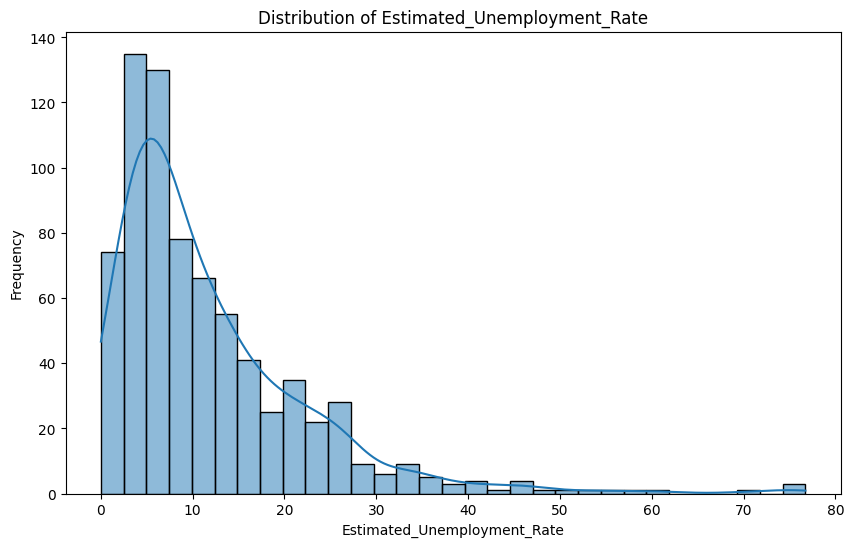

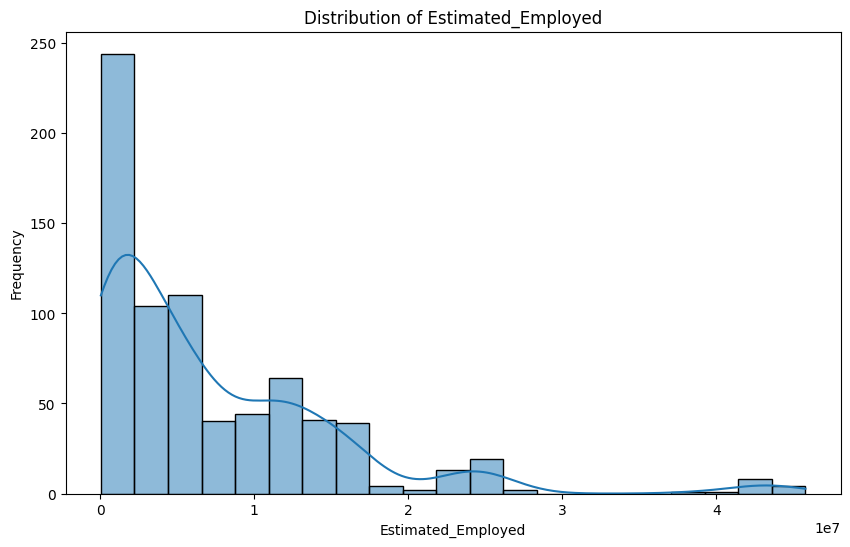

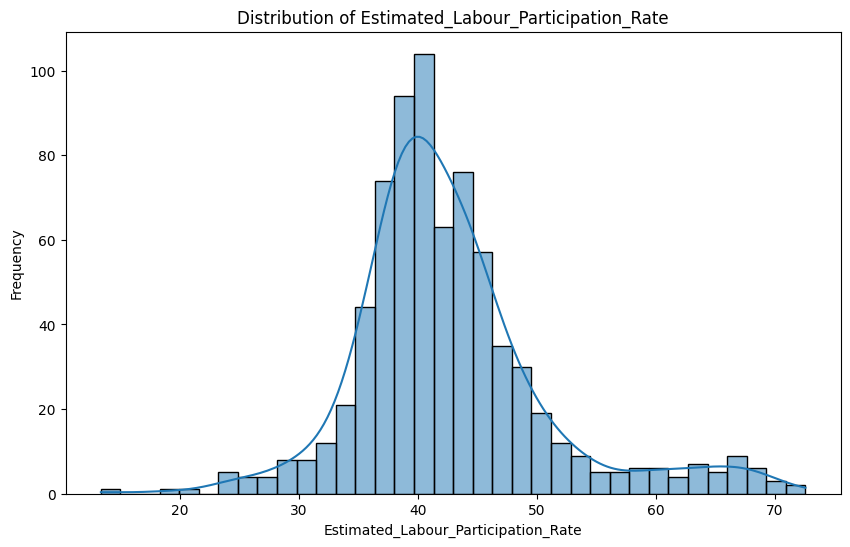

In [ ]:
# Plot distributions of numerical columns
numerical_columns = ['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

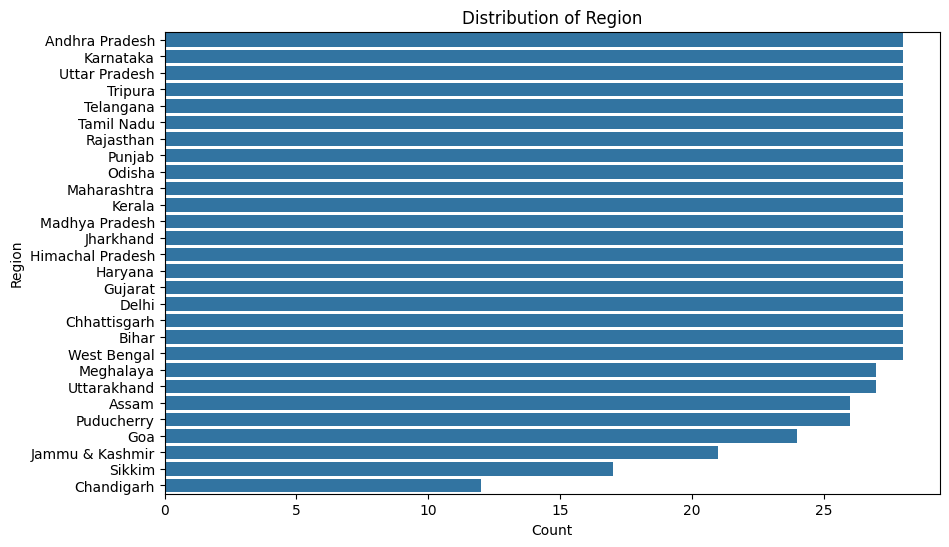

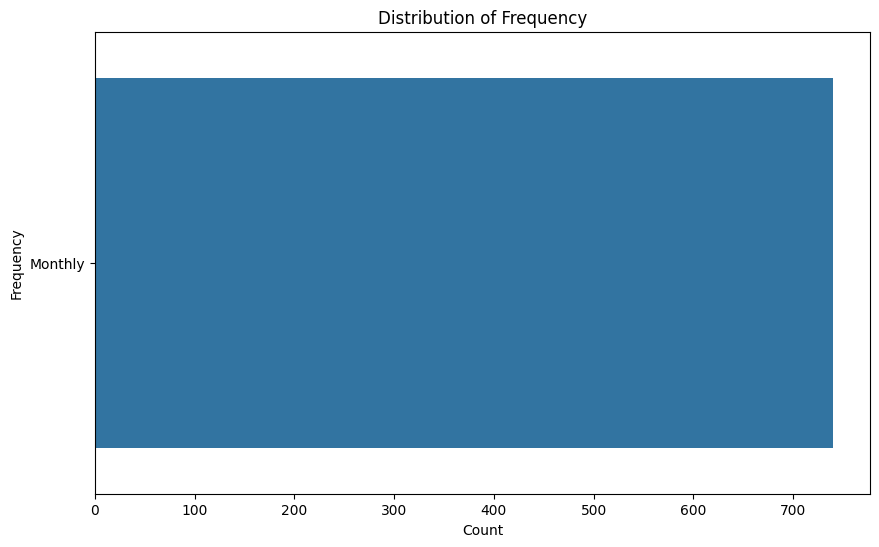

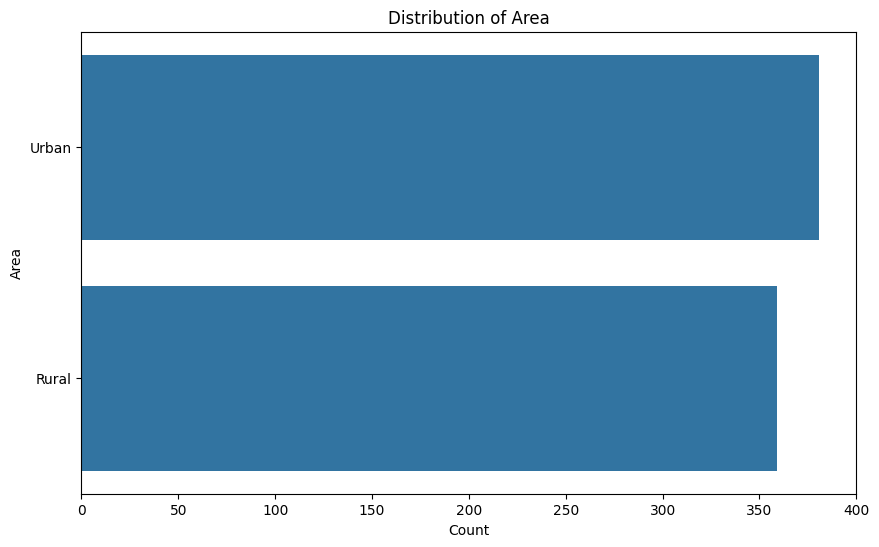

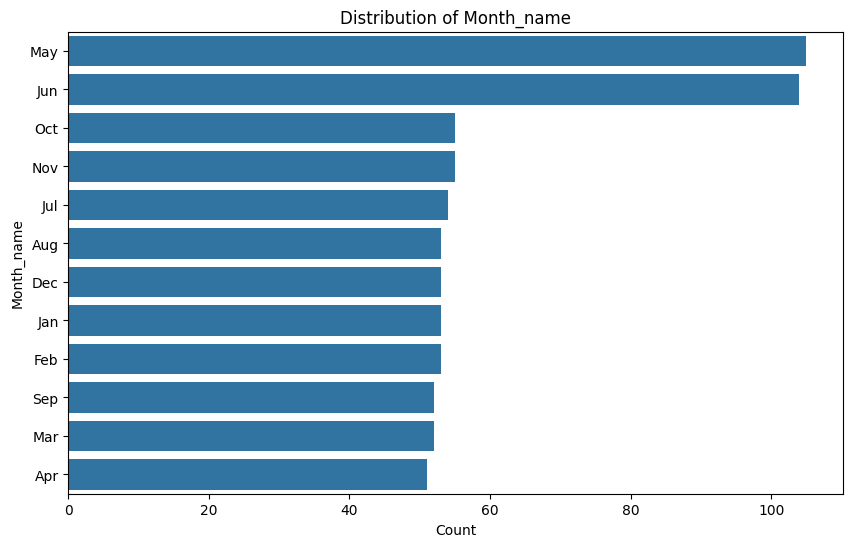

In [ ]:
# Plot count plots for categorical columns
categorical_columns = ['Region', 'Frequency', 'Area', 'Month_name']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()


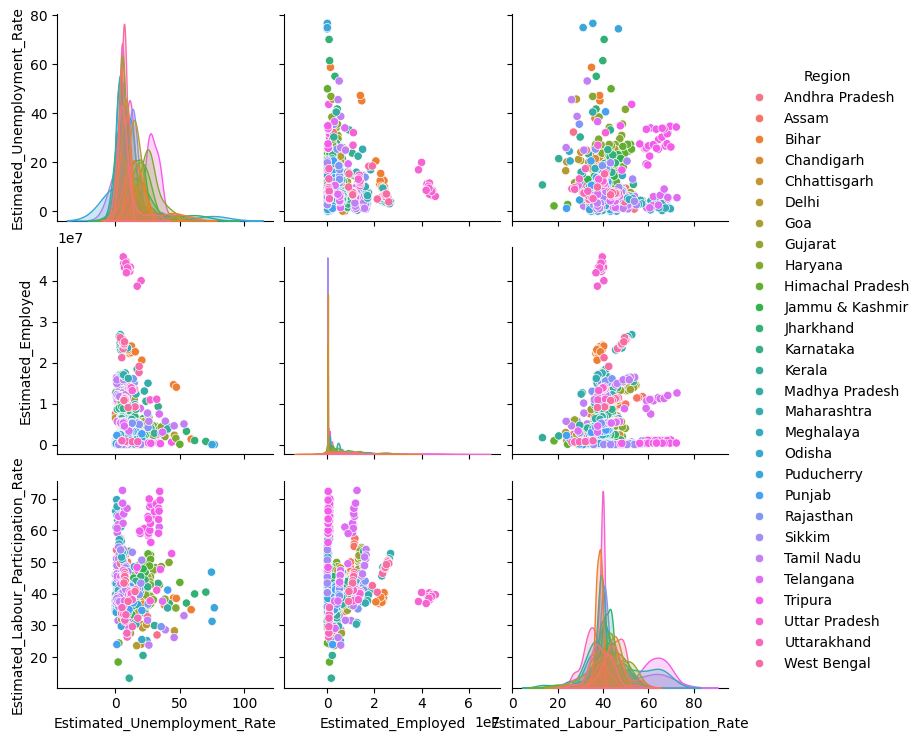

In [ ]:
# Scatter plots for numerical columns
sns.pairplot(df, vars=numerical_columns, hue='Region')
plt.show()


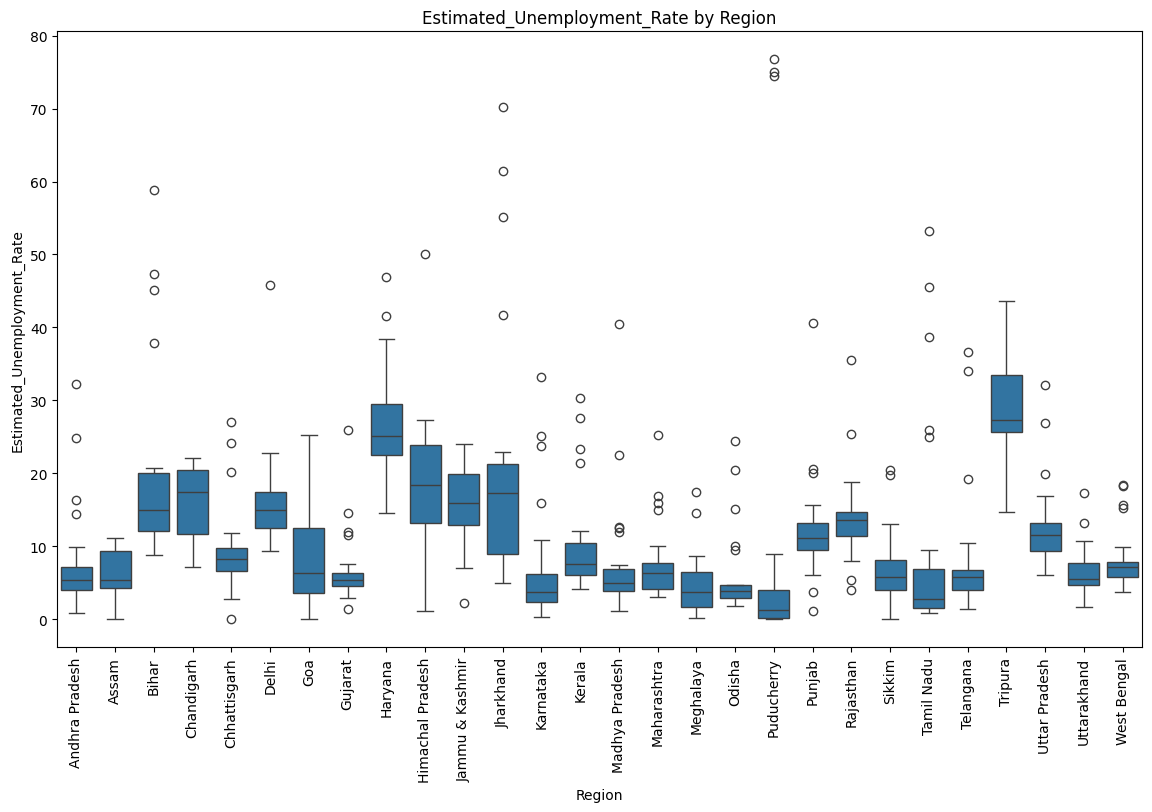

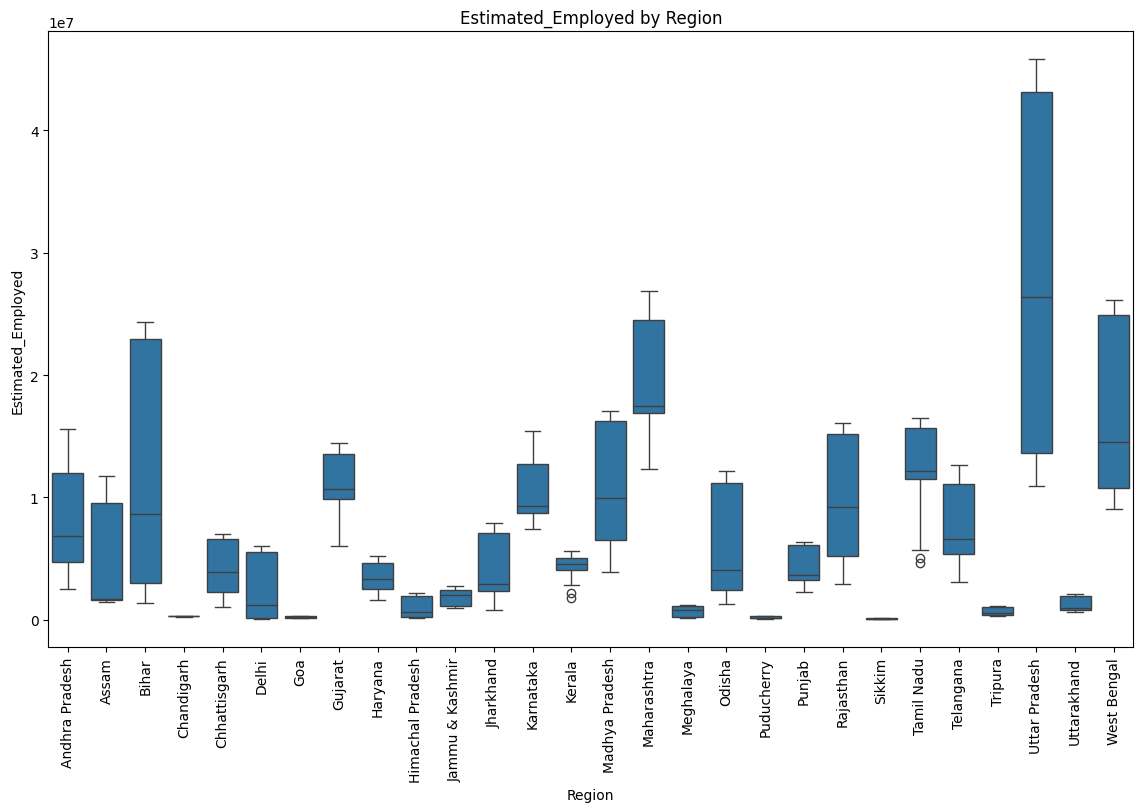

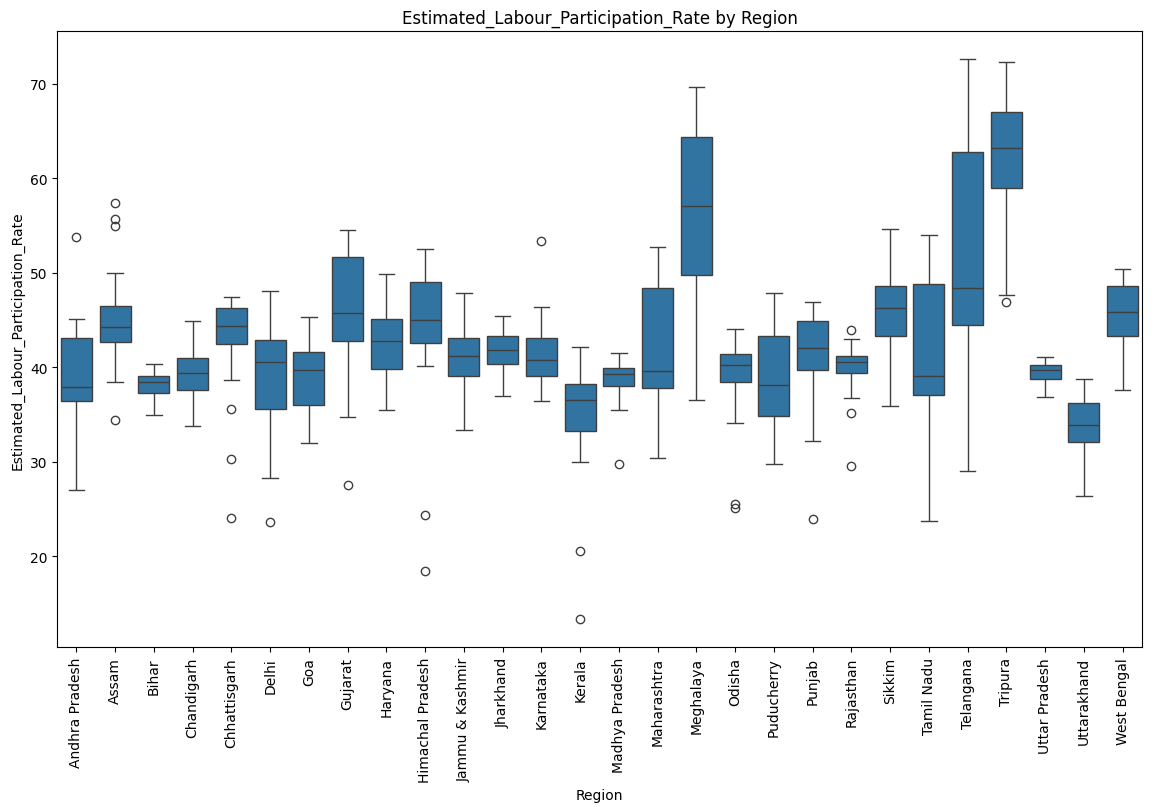

In [ ]:
# Box plots for numerical columns by categorical columns
for column in numerical_columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Region', y=column, data=df)
    plt.title(f'{column} by Region')
    plt.xlabel('Region')
    plt.ylabel(column)
    plt.xticks(rotation=90)
    plt.show()

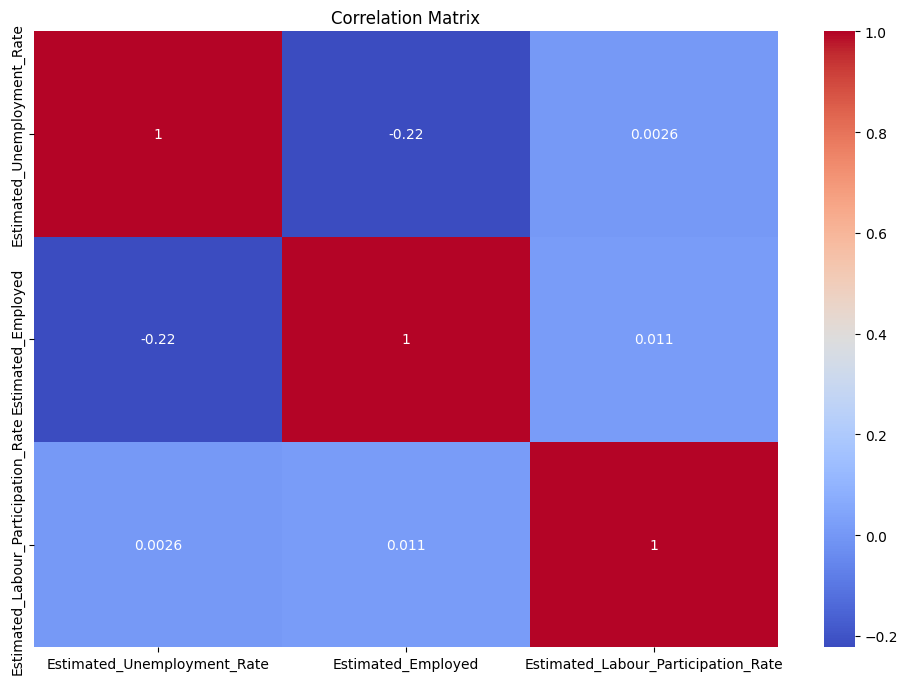

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

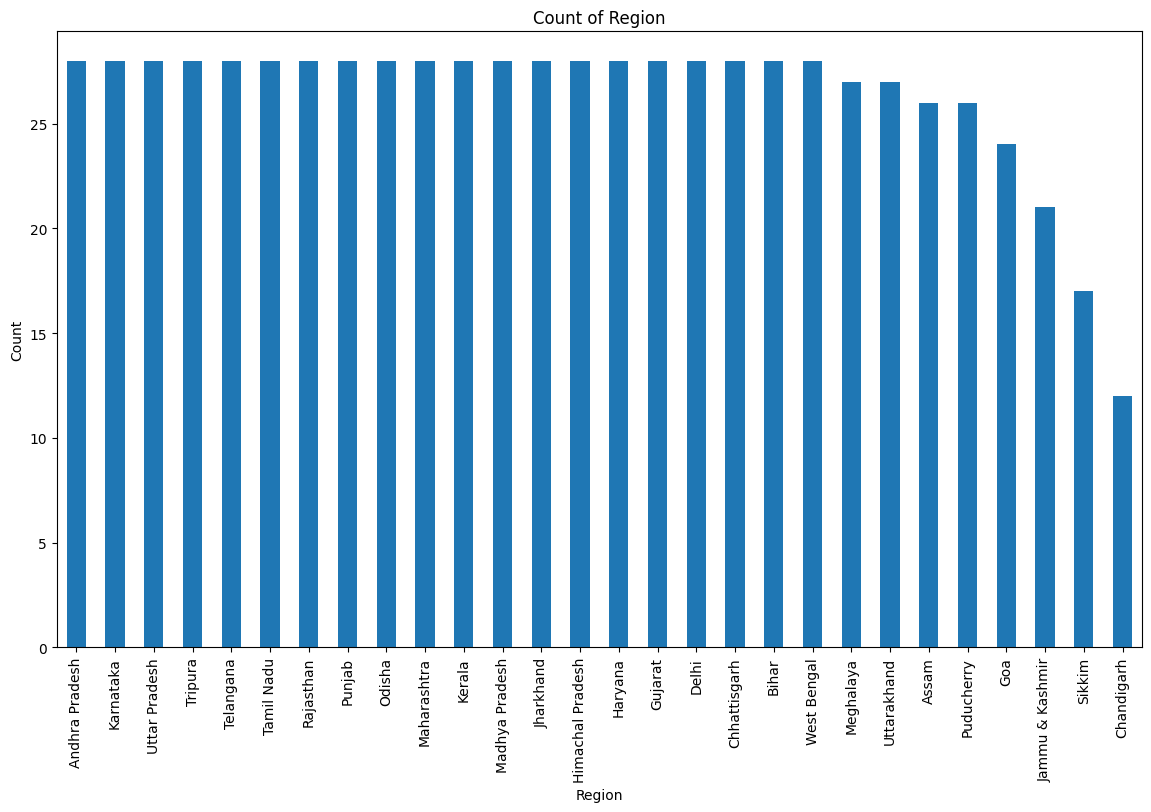

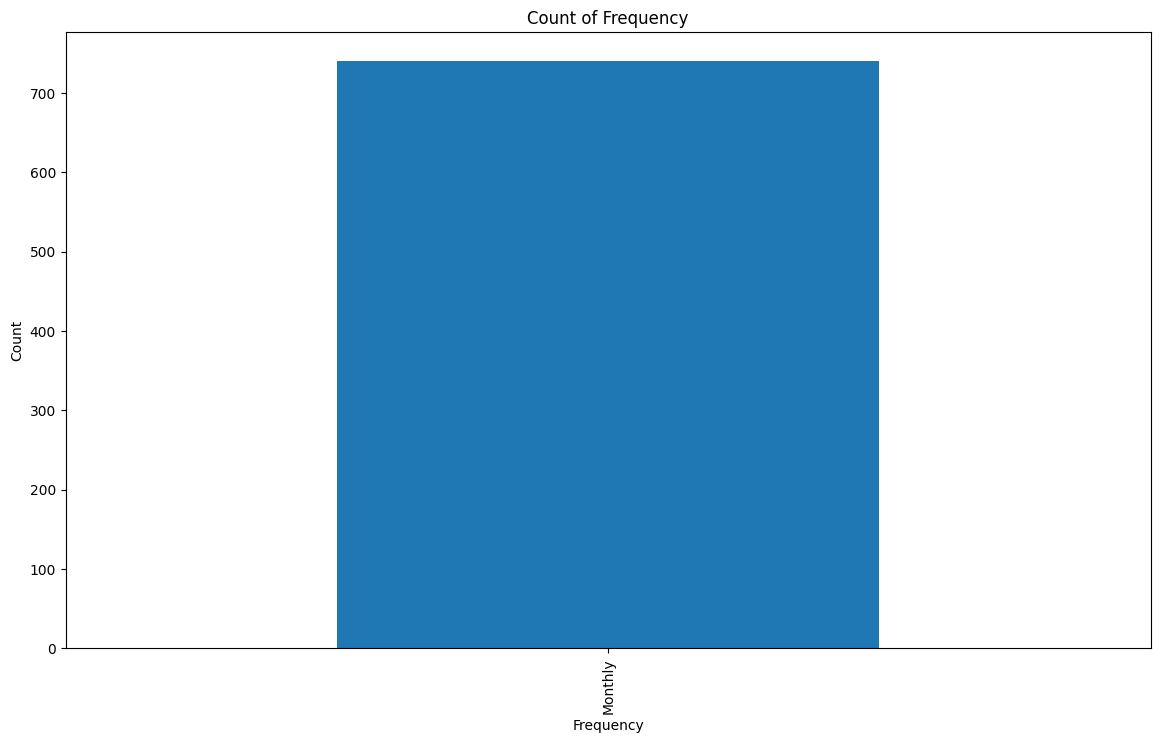

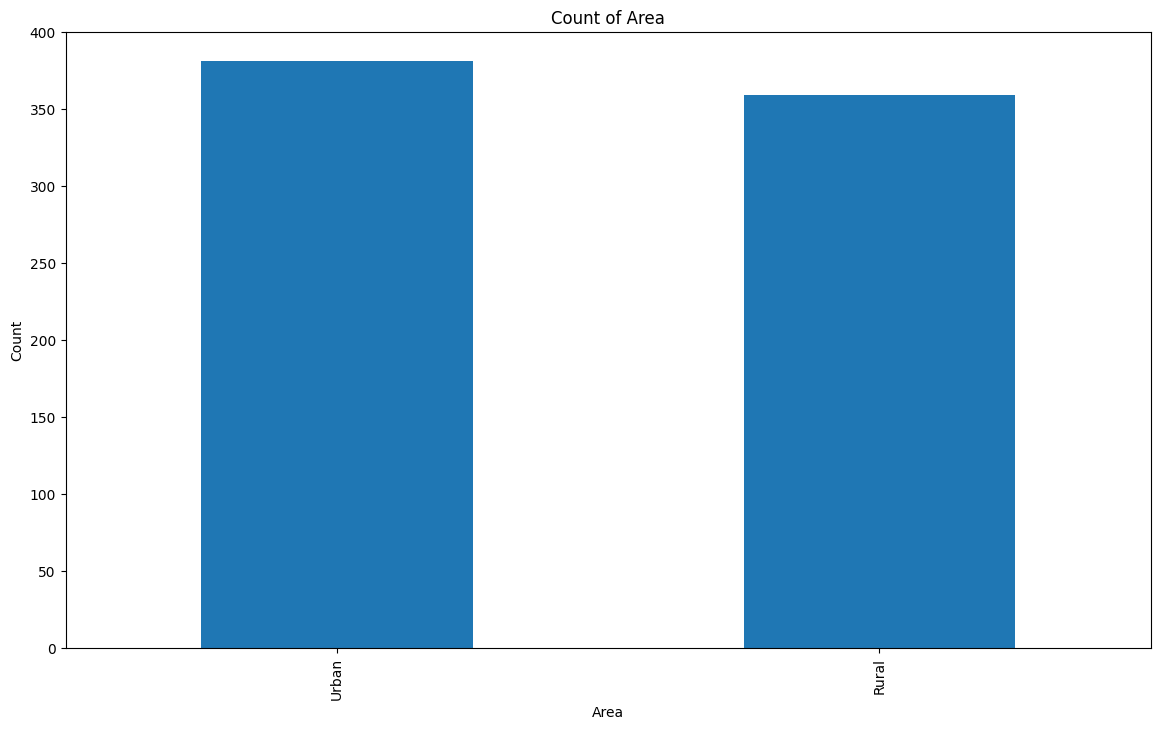

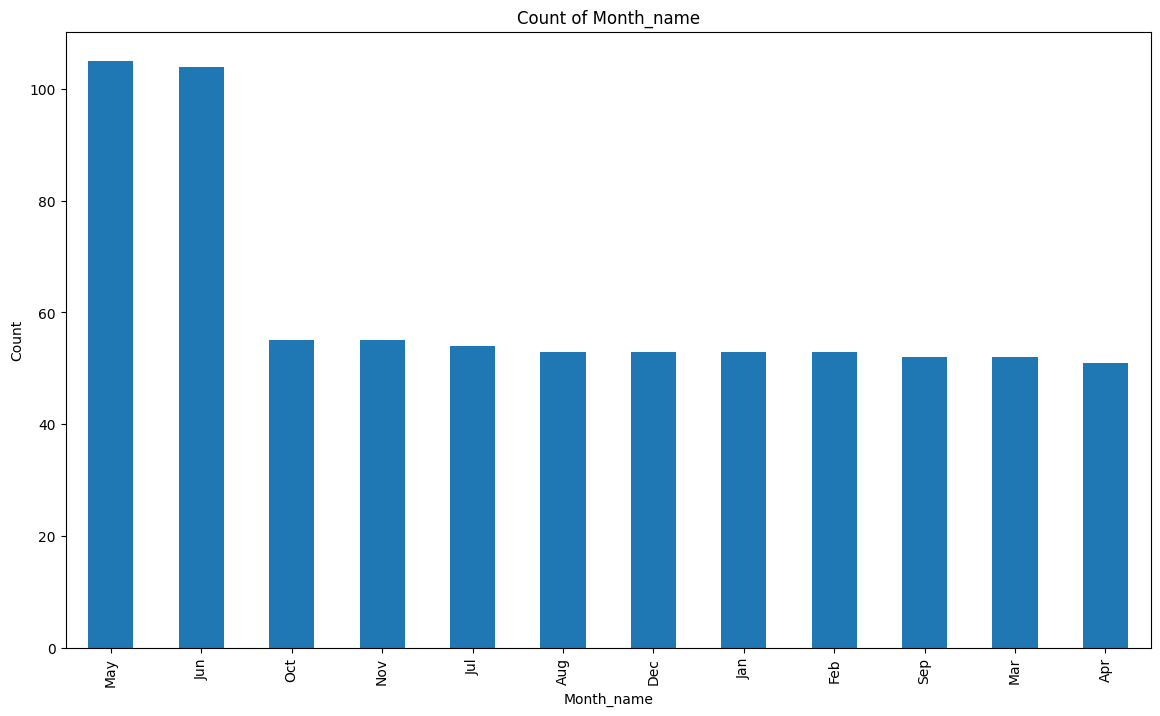

In [ ]:
# Plot bar charts for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(14, 8))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

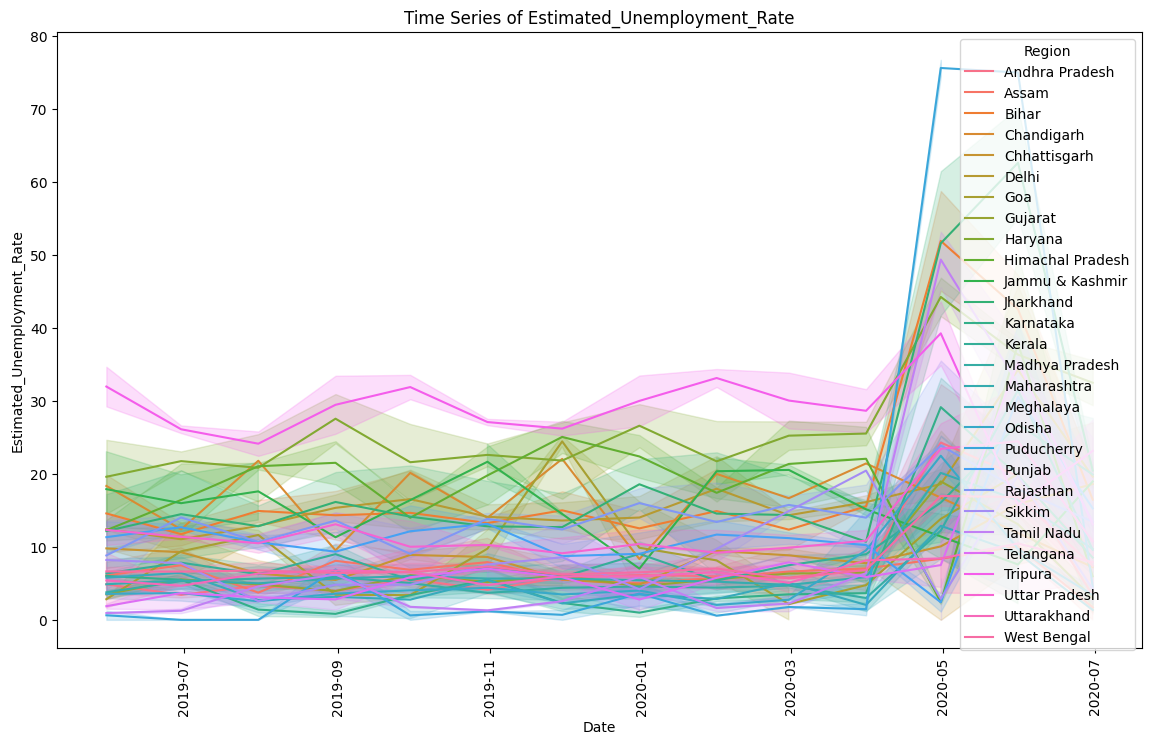

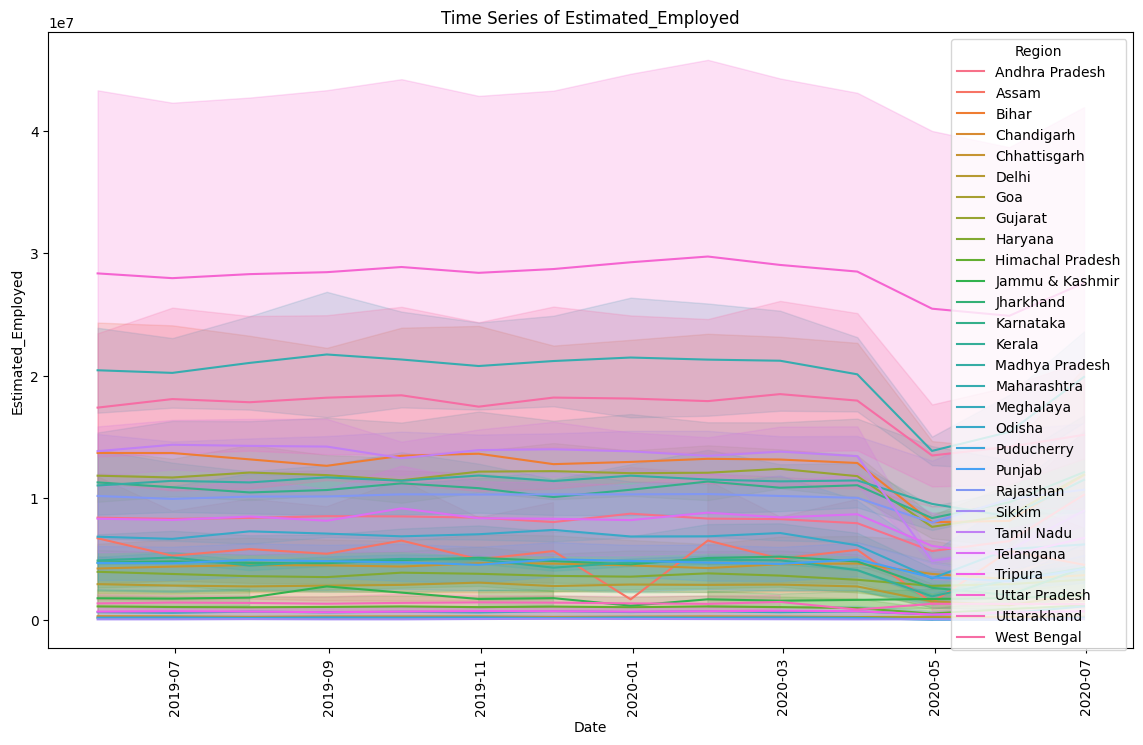

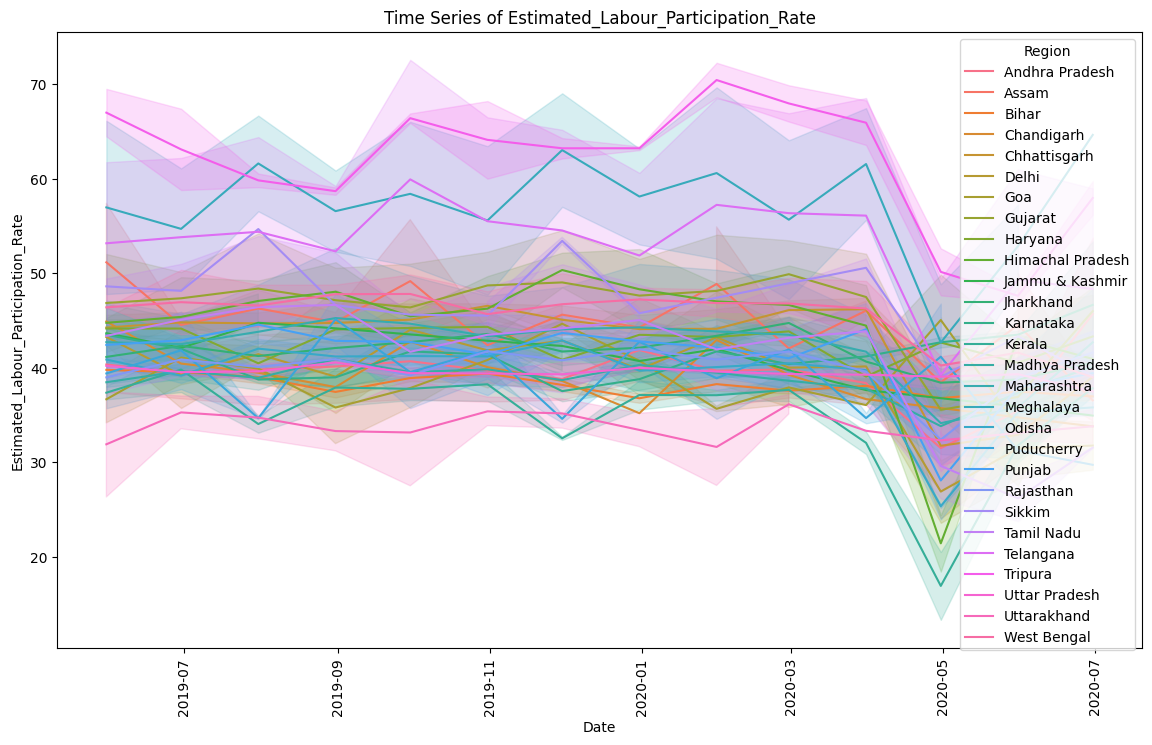

In [ ]:
# Plot time series for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Date', y=column, data=df, hue='Region')
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(rotation=90)
    plt.show()